## Visualización Chula

http://students.brown.edu/seeing-theory/regression-analysis/index.html#section1

## US Tuition

Does the higher cost of tuition translate into higher-paying jobs? The table lists the top ten colleges based on mid-career salary and the associated yearly tuition costs. Construct a scatter plot of the data.

In [22]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
df=pd.read_csv("US_Schools.csv")
df

,School,Mid-Career Salary (in thousands),Yearly Tuition
0,Princeton,137,28540
1,Harvey Mudd,135,40133
2,CalTech,127,39900
3,US Naval Academy,122,0
4,West Point,120,0
5,MIT,118,42050
6,Lehigh University,118,43220
7,NYU-Poly,117,39565
8,Babson College,117,40400
9,Stanford,114,54506


In [24]:
dineros=df["Mid-Career Salary (in thousands)"].values
escuela=df["Yearly Tuition"].values

(array([1., 4., 1., 1., 0., 1., 0., 0., 0., 2.]),
 array([114. , 116.3, 118.6, 120.9, 123.2, 125.5, 127.8, 130.1, 132.4,
        134.7, 137. ]),
 <a list of 10 Patch objects>)

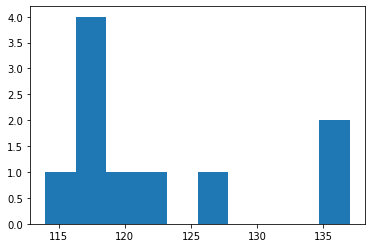

In [25]:
plt.hist(dineros)

(array([2., 0., 0., 0., 0., 1., 0., 6., 0., 1.]),
 array([    0. ,  5450.6, 10901.2, 16351.8, 21802.4, 27253. , 32703.6,
        38154.2, 43604.8, 49055.4, 54506. ]),
 <a list of 10 Patch objects>)

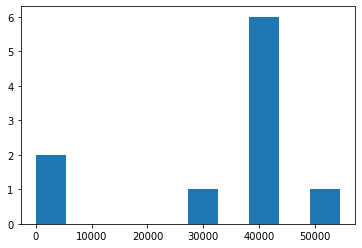

In [26]:
plt.hist(escuela)

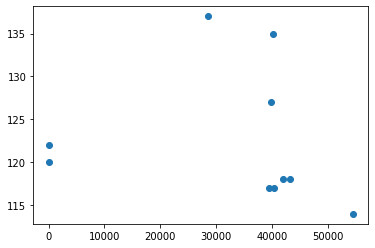

In [27]:
plt.scatter(escuela,dineros)

In [28]:
from scipy import stats
result = stats.linregress(escuela,dineros)

In [29]:
result

LinregressResult(slope=-6.302748869042849e-05, intercept=124.56928069219093, rvalue=-0.14607228867600155, pvalue=0.6871979418785442, stderr=0.00015091546120167594)

In [36]:
result.slope

-6.302748869042849e-05

In [37]:
escuela*result.slope+result.intercept

array([122.77047616, 122.03979849, 122.05448389, 124.56928069,
       124.56928069, 121.91897479, 121.84523263, 122.0755981 ,
       122.02297015, 121.13390439])

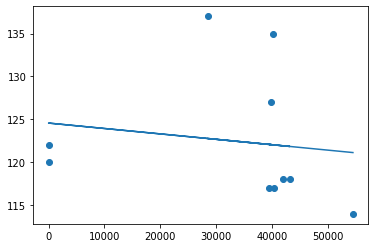

In [38]:
plt.scatter(escuela,dineros)
plt.plot(escuela,escuela*result.slope+result.intercept)

What would happen if we remove the schools with 0 tuition ?

In [14]:
df_new=df[df["Yearly Tuition"]>0]
df_new

,School,Mid-Career Salary (in thousands),Yearly Tuition
0,Princeton,137,28540
1,Harvey Mudd,135,40133
2,CalTech,127,39900
5,MIT,118,42050
6,Lehigh University,118,43220
7,NYU-Poly,117,39565
8,Babson College,117,40400
9,Stanford,114,54506


In [15]:
dineros=df_new["Mid-Career Salary (in thousands)"].values
escuela=df_new["Yearly Tuition"].values

In [16]:
result = stats.linregress(escuela,dineros)

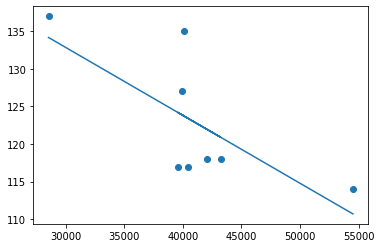

In [17]:
plt.scatter(escuela,dineros)
plt.plot(escuela,escuela*result.slope+result.intercept)

In [22]:
result.rvalue

-0.7139776012651265

In [ ]:
# Aunque salgan correladas, al tener pocos valores, no nos podemos fiar de esa relacion.

## Life Expectancy

1. Show the evolution of life expectancy over the years with a regression line. 
2. Give an estimation (and plot) the life expectancy in 1920
3. What would be the life expectancy in 2030 ?

In [39]:
df=pd.read_csv("life_expectancy.csv")
df

,Year of Birth,Life Expectancy
0,1930,59.7
1,1940,62.9
2,1950,70.2
3,1965,69.7
4,1973,71.4
5,1982,74.5
6,1987,75.0
7,1992,75.7
8,2010,78.7


In [40]:
anios = df["Year of Birth"].values
vida = df["Life Expectancy"].values

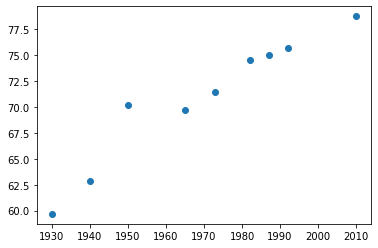

In [41]:
plt.scatter(anios,vida)

In [42]:
result = stats.linregress(anios,vida)

In [43]:
result

LinregressResult(slope=0.22747971788495247, intercept=-377.24310204248025, rvalue=0.9612611619245914, pvalue=3.627261168786575e-05, stderr=0.024654333963315993)

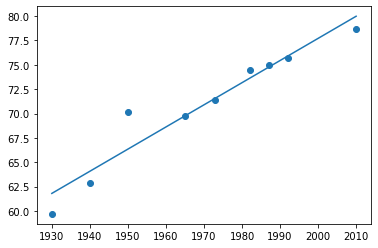

In [44]:
plt.scatter(anios,vida)
plt.plot(anios,result.slope*anios+result.intercept)

In [45]:
x = 1920
result.slope*x + result.intercept

59.51795629662848

In [46]:
x = 2030
result.slope*x + result.intercept

84.54072526397329

In [47]:
x = 1000
result.slope*x + result.intercept

-149.76338415752778

In [48]:
# House price

In [49]:
precios = np.array([  4.9176,   5.0208,   4.5429,   4.5573,   5.0597,   3.891 ,
         5.898 ,   5.6039,  16.4202,  14.4598,   5.8282,   5.3003,
         6.2712,   5.9592,   5.05  ,   5.6039,   8.2464,   6.6969,
         7.7841,   9.0384,   5.9894,   7.5422,   8.7951,   6.0931,
         8.3607,   8.14  ,   9.1416,  12.    ])
area = np.array([  3.472 ,   3.531 ,   2.275 ,   4.05  ,   4.455 ,   4.455 ,
         5.85  ,   9.52  ,   9.8   ,  12.8   ,   6.435 ,   4.9883,
         5.52  ,   6.666 ,   5.    ,   9.52  ,   5.15  ,   6.902 ,
         7.102 ,   7.8   ,   5.52  ,   4.    ,   9.89  ,   6.7265,
         9.15  ,   8.    ,   7.3262,   5.    ])

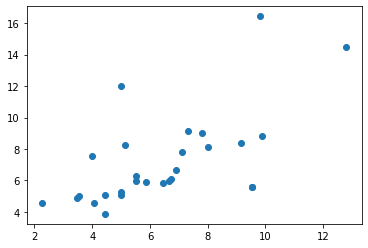

In [50]:
plt.scatter(area,precios);

In [51]:
result = stats.linregress(area,precios)

In [52]:
aprox = result.slope*area + result.intercept

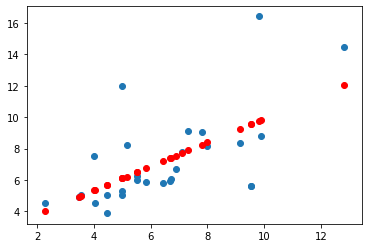

In [53]:
plt.scatter(area,precios)
plt.scatter(area,aprox,color="red");

In [104]:
errores = precios-aprox

In [49]:
errores

array([-0.02391748,  0.03426872,  0.51462868, -0.82520017, -0.63179323,
       -1.80049323, -0.85780266, -3.95191385,  6.65076131,  2.40152383,
       -1.37392597, -0.79807224, -0.23283054, -1.41916646, -1.05729871,
       -3.95191385,  2.02465942, -0.86152167,  0.07308916,  0.79485297,
       -0.51463054,  2.19784712, -1.04300381, -1.33142468, -0.9128239 ,
       -0.25613619,  1.2595367 ,  5.89270129])

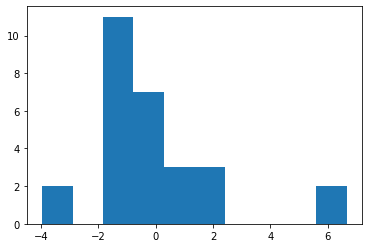

In [51]:
plt.hist(errores);

In [52]:
mu = errores.mean()
s = errores.std()

In [53]:
error_norm = stats.norm(mu,s)

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


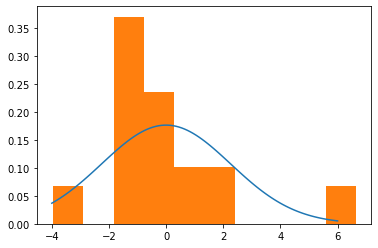

In [55]:
x = np.linspace(-4,6,100)
plt.plot(x,error_norm.pdf(x))

plt.hist(errores,normed=True);

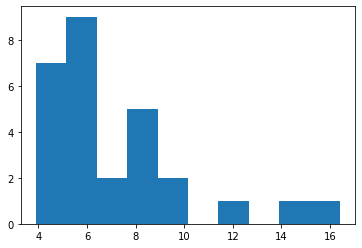

In [57]:
plt.hist(precios);

In [58]:
precios.mean()

7.221853571428573

In [62]:
precios_expon = stats.expon(scale=precios.mean())

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


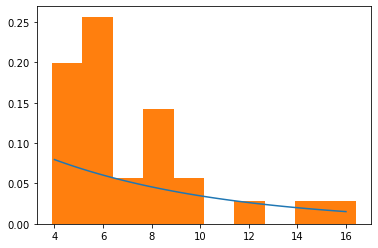

In [65]:
x = np.linspace(4,16,100)
plt.plot(x,precios_expon.pdf(x))

plt.hist(precios,normed=True);

In [1]:
# Ejemplo chorra

In [67]:
mi_norm = stats.norm(3,1)

In [74]:
muestra1 = mi_norm.rvs(10)
muestra1

array([1.88375127, 2.50163134, 4.15091148, 3.38026416, 3.81781842,
       5.60452817, 3.90568763, 3.59436483, 1.25590977, 3.32266512])

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


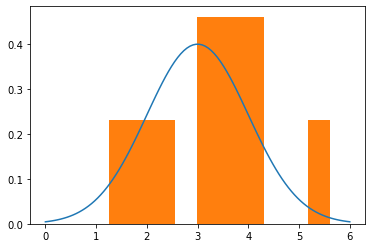

In [75]:
x = np.linspace(0,6,100)
plt.plot(x,mi_norm.pdf(x))

plt.hist(muestra1,normed=True);

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


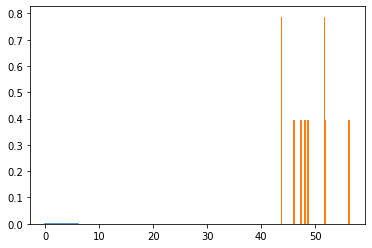

In [52]:
muestra2 = mi_norm.rvs(10)
x = np.linspace(0,6,100)
plt.plot(x,mi_norm.pdf(x))

plt.hist(muestra2,normed=True,bins=50);

In [53]:
# Exo
from scipy import stats

In [86]:
mi_norm = stats.norm(50,5)
muestra1 = mi_norm.rvs(10)

In [87]:
#x = np.linspace(30,70,100)
#plt.plot(x,mi_norm.pdf(x));
#plt.hist(muestra1,normed=True);

In [95]:
media_muestral = muestra1.mean()

In [96]:
des_muestral = muestra1.std()

In [97]:
est_norm = stats.norm(media_muestral, des_muestral)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


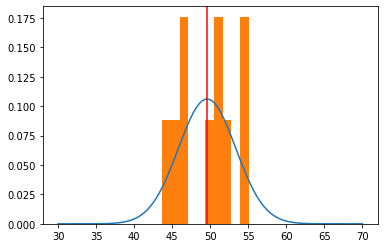

In [98]:
x = np.linspace(30,70,100)
plt.plot(x,est_norm.pdf(x));
plt.hist(muestra1,normed=True)
plt.axvline(x=media_muestral,color='red');